In [1]:
import tensorflow as tf

In [12]:
tf.__version__

'2.4.0'

In [4]:
from tensorflow.keras.datasets import mnist
(MNIST_x_data_train, MNIST_y_data_train), (MNIST_x_data_test, MNIST_y_data_test) = mnist.load_data()

In [5]:
MNIST_CNN = tf.keras.models.load_model('../models/cnn_simple_mnist_no_pickle')
MNIST_CNN.trainable=False

In [6]:
MNIST_CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [7]:
from xailib.explainers.intgrad_explainer import IntgradImageExplainer

In [8]:
ig = IntgradImageExplainer(MNIST_CNN)

In [9]:
image = MNIST_x_data_train[0,:].reshape(28,28,1)
scores = ig.explain(image,1,'white')

In [10]:
scores.shape

(28, 28, 1)

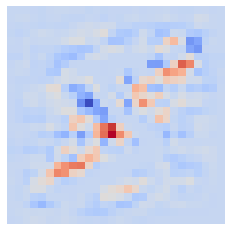

In [11]:
import matplotlib.pyplot as plt
plt.imshow(scores,cmap='coolwarm')
plt.axis('off');